In [1]:
# dataset
import numpy as np
from tensorflow.keras.models import Sequential   # 모델 객체 생성
from tensorflow.keras.layers import Dense, Input # 모델 layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt

In [4]:
# 1. dataset
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], 
                   [1], 
                   [1], 
                   [0]])
# 2. 모델구성
model = Sequential()
# model.add(Input(shape=2))
model.add(Dense(units=10,
               input_shape=(2,), #input_dim=2,
               activation='relu'))
model.add(Dense(units=20, activation='relu')) #은닉층(hidden layer)에서는 input_shape를 X
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())

# 3. 모델 학습과정 설정
# model.compile(loss='mse', optimizer = 'adam', metrics=['mae']) 회귀식에서 학습과정 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) # 2진분류
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 다중분류

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# 4. 학습
hist = model.fit(x_data, y_data, 
                 epochs=100, 
                 verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 0.6807 - binary_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.6789 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6773 - binary_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6756 - binary_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6740 - binary_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.6723 - binary_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6691 - binary_accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6675 - binary_accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 17ms/

Epoch 79/100
1/1 [==============================] - 0s 0s/step - loss: 0.5726 - binary_accuracy: 0.7500
Epoch 80/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5711 - binary_accuracy: 0.7500
Epoch 81/100
1/1 [==============================] - 0s 0s/step - loss: 0.5693 - binary_accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5676 - binary_accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5659 - binary_accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 0s/step - loss: 0.5643 - binary_accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - binary_accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5609 - binary_accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5591 - binary_accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 

In [7]:
# 5. 학습과정 보기 및 평가
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

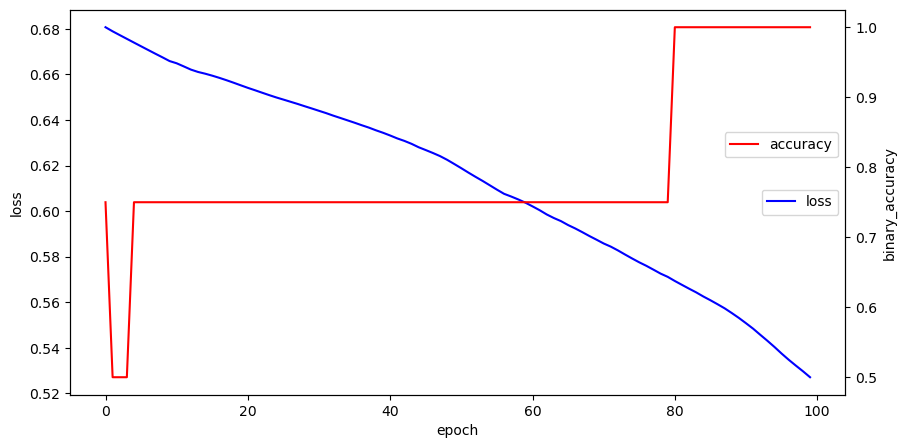

In [15]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'b', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'], 'r', label='accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999,0.7))
plt.show()

In [18]:
# 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss:', score[0])
print('accuracy :', score[1])

1/1 [==============================] - 0s 34ms/step - loss: 0.5245 - binary_accuracy: 1.0000
loss: 0.5245027542114258
accuracy : 1.0


In [22]:
# 예측 
int(model.predict(np.array([[0, 1]])).round())

1/1 [==============================] - 0s 18ms/step


1

In [30]:
# 리스트에 0과 1만 들어 있는지 여부
temp = [0,1,2]
print(all([x in (0,1) for x in temp]))
print(all(x in (0,1) for x in temp))

False
False


In [37]:
# 독립변수 2개 (0 0, 0 1, 1 0, 1 1)를 입력받아 예측받아 출력(종료는 수를 1개만 입력할 때)
while True :
    input_str = input('soace로 분리해서 0또는 1을 2개 입력 (1개 입력시 종료)') # '0', '1'
#     ' 0 1' -> '0 1' -> '0', '1'
    input_list = input_str.strip().split()
    input_nums = list(map(int, input_list)) #[0,1]
    if len(input_nums) == 1:
        print('데이터를 하나만 입력할 경우 종료됩니다.')
        break
    if all(x in [0, 1] for x in input_nums):  # 0과 1만 입력한 경우
        input_data = np.array(input_nums[:2]).reshape(-1 ,2)
        print('입력값 :', input_nums[0], input_nums[1])
        print('예측값 :', int(model.predict(input_data).round()))
    else:
        print('0, 1 만 입력하셔야 예측값을 볼 수 있습니다')

soace로 분리해서 0또는 1을 2개 입력 (1개 입력시 종료)1
데이터를 하나만 입력할 경우 종료됩니다.


# 2. AND

In [47]:
# 1. dataset 
x_data = np.array([[0, 1],
                  [0, 0],
                  [1, 0],
                  [1, 1]])
y_data = np.array([[0],
                  [0],
                  [0],
                  [1]])

In [55]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(units=10,
         input_shape=(2,),
         activation='relu'))
model.add(Dense(units=20,
         activation='relu'))
model.add(Dense(units=1,
         activation='sigmoid'))
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                30        
                                                                 
 dense_32 (Dense)            (None, 20)                220       
                                                                 
 dense_33 (Dense)            (None, 1)                 21        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
# 3. 모델학습과정 (이진분류)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [57]:
# 4. 학습
hist = model.fit(x_data, y_data,
                epochs=100,
                verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 359ms/step - loss: 0.7046 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.7030 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7014 - binary_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6999 - binary_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.6984 - binary_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6969 - binary_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6954 - binary_accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6940 - binary_accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6925 - binary_accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 9ms/step - loss: 0.6180 - binary_accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6165 - binary_accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 0s/step - loss: 0.6149 - binary_accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6132 - binary_accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 0s/step - loss: 0.6115 - binary_accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6098 - binary_accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6081 - binary_accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6064 - binary_accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6047 - binary_accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 0s/step - los

dict_keys(['loss', 'binary_accuracy'])
1/1 [==============================] - 0s 27ms/step - loss: 0.5782 - binary_accuracy: 1.0000
loss : 0.5781994462013245
accuracy : 1.0


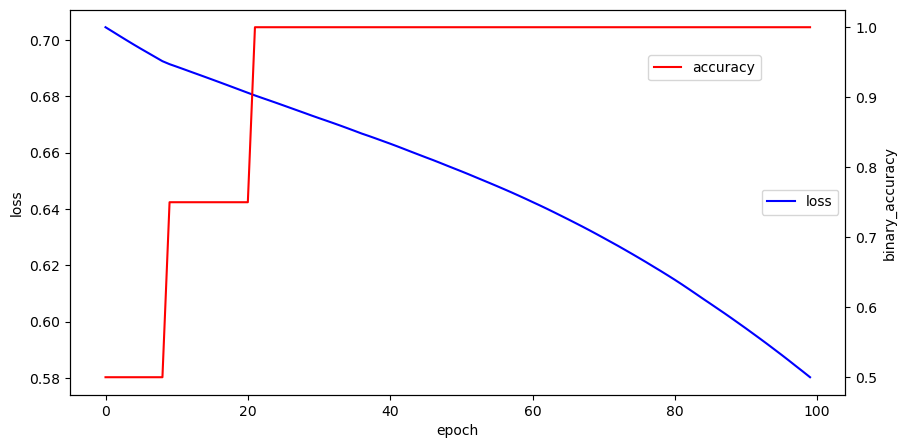

In [59]:
# 5. 학습과정 살펴보기 및 평가o
print(hist.history.keys())
score = model.evaluate(x_data, y_data)
print('loss :', score[0])
print('accuracy :', score[1])

fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'b', label='loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'r', label='accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.9, 0.9))
plt.show()

In [ ]:
# 6. 예측하기 : np.array([[0, 1]])를 예측하기
int(model.predict(np.array([[0, 1]])).round())